In [0]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.decomposition import FastICA
#from sklearn.random_projection import SparseRandomProjection
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import silhouette_score
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score, precision_score, recall_score,f1_score
from sklearn.metrics import make_scorer, accuracy_score

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

In [0]:
data_1=pd.read_csv("/kaggle/input/bankpromotion/bank-additional-full.csv",sep=";")
data_2=pd.read_csv("/kaggle/input/bankpromotion/bank-additional.csv",sep=";")
data=pd.concat([data_1,data_2],axis=0)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Text(0.5, 1, 'Variable Correlation')

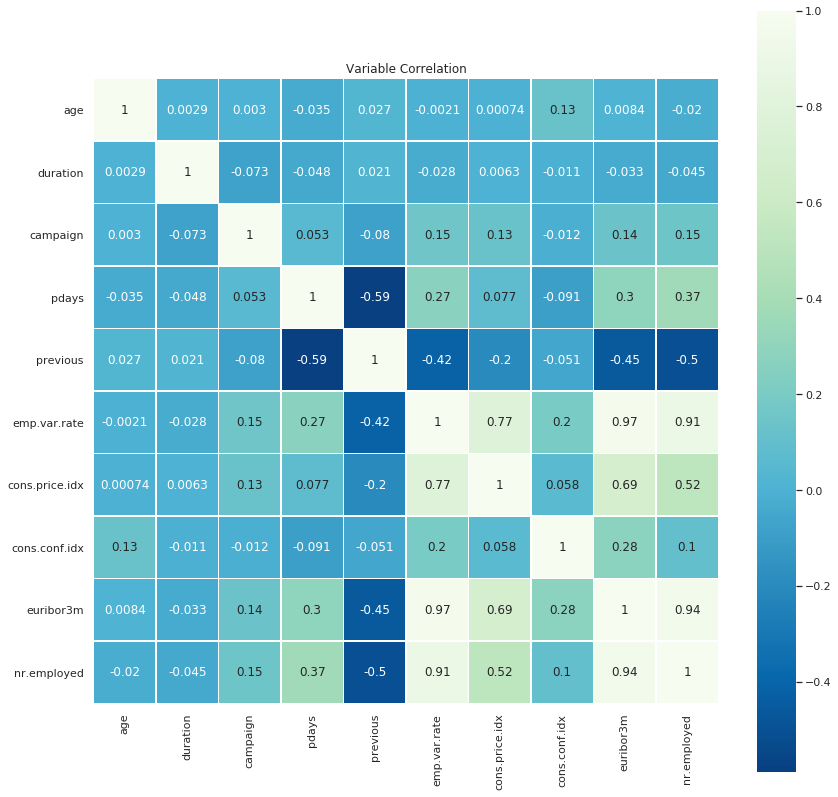

In [0]:


#Correlation Plot
plt.figure(figsize=(14,14))
sns.set(font_scale=1)
sns.heatmap(data.corr(),cmap='GnBu_r',annot=True, square = True ,linewidths=.5);
plt.title('Variable Correlation')



In [0]:


#To avoid mulicorinality drop the higly correltaed column
data = data.drop(["emp.var.rate","nr.employed"],axis=1)
data.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857,no


In [0]:
#label encoding

jobDummies = pd.get_dummies(data['job'], prefix = 'job')
maritalDummies = pd.get_dummies(data['marital'], prefix = 'marital')
educationDummies = pd.get_dummies(data['education'], prefix = 'education')
defaultDummies = pd.get_dummies(data['default'], prefix = 'default')
housingDummies = pd.get_dummies(data['housing'], prefix = 'housing')
loanDummies = pd.get_dummies(data['loan'], prefix = 'loan')
contactDummies = pd.get_dummies(data['contact'], prefix = 'contact')
poutcomeDummies = pd.get_dummies(data['poutcome'], prefix = 'poutcome')
data['month']=data['month'].astype('category')
data['day_of_week']=data['day_of_week'].astype('category')
data['y']=data['y'].astype('category')

# Assigning numerical values and storing in another column
data['month'] = data['month'].cat.codes
data['day_of_week'] = data['day_of_week'].cat.codes
data['y'] = data['y'].cat.codes

data['y'].dtype

dtype('int8')

In [0]:


data["age"]=data["age"].astype("int")
data["duration"]=data["duration"].astype("int")
data["pdays"]=data["pdays"].astype("int")
data["previous"]=data["previous"].astype("int")
data["campaign"]=data["campaign"].astype("int")
data_int=data.select_dtypes(include=['int','float64','bool'])
#data_int
bank_df=pd.concat([data_int,jobDummies,maritalDummies,educationDummies,defaultDummies,housingDummies,loanDummies
                  ,contactDummies,poutcomeDummies,data['month'],data['day_of_week'],data['y']],axis=1)
bank_df.head()



,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,...,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,month,day_of_week,y
0,56,261,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,1,0,6,1,0
1,57,149,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,1,0,6,1,0
2,37,226,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,1,0,6,1,0
3,40,151,1,999,0,93.994,-36.4,4.857,1,0,...,0,0,0,1,0,1,0,6,1,0
4,56,307,1,999,0,93.994,-36.4,4.857,0,0,...,0,1,0,1,0,1,0,6,1,0


49


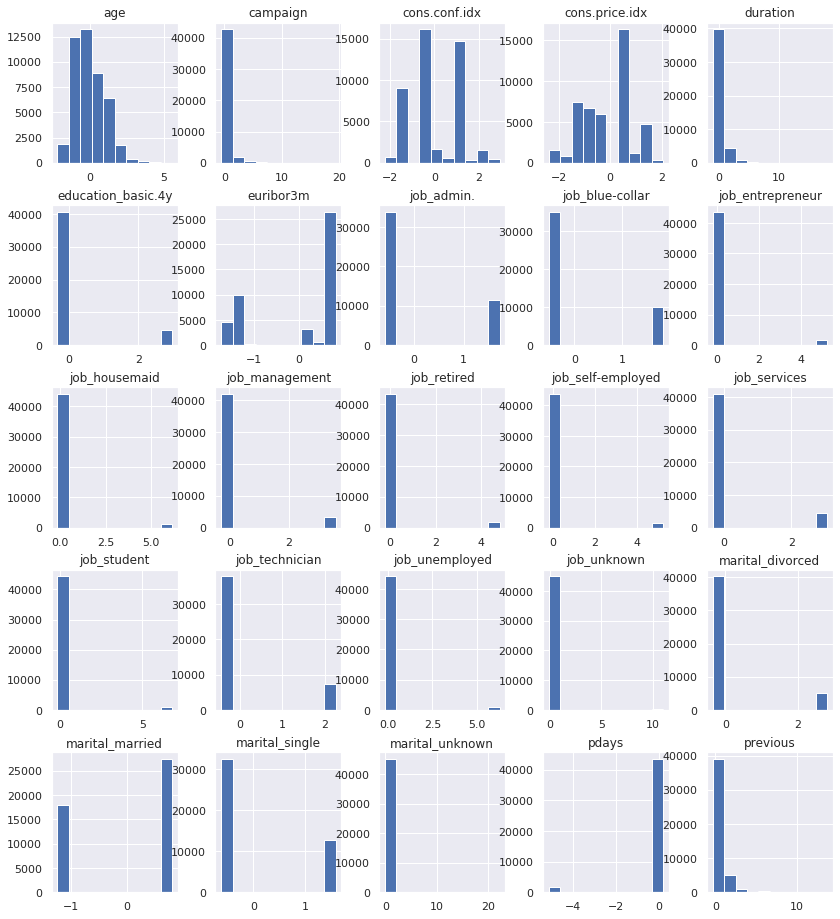

In [0]:


#checking variable distribution
print(len(bank_df.columns))
df_test = bank_df.iloc[:,0:25]
for index in range(25):
    df_test.iloc[:,index] = (df_test.iloc[:,index]-df_test.iloc[:,index].mean()) / df_test.iloc[:,index].std();
df_test.hist(figsize= (14,16));



In [0]:


#Predictors count
bank_df.groupby('y').size()



y
0    40216
1     5091
dtype: int64

In [0]:
#Total features after one-hot-encoding
features = bank_df.columns
len(features)

49

In [0]:
#Variables and Output
y=np.array(bank_df["y"])
X=np.array(bank_df.iloc[:,0:48])

In [0]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)


# K-Means

In [0]:
#kmeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

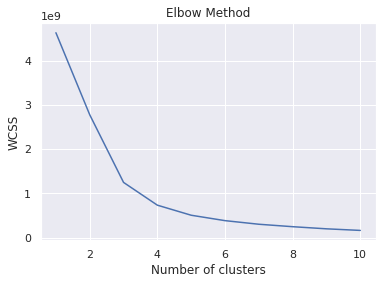

In [0]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
#kmeans
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

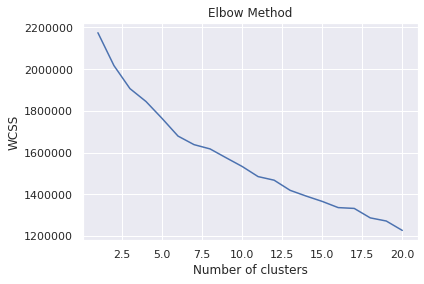

In [0]:
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)


bank_df['clusters1'] = pred_y

bank_df.clusters1.unique()
bank_df['clusters1'].value_counts()

0    39679
1     5628
Name: clusters1, dtype: int64

In [0]:
matrix = confusion_matrix(y, bank_df['clusters1'])
print(matrix)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y, bank_df['clusters1'])
print('Accuracy: %f' % accuracy)
#precision tp / (tp + fp)
precision = precision_score(y, bank_df['clusters1'])
print('Precision: %f' % precision)

[[36966  3250]
 [ 2713  2378]]
Accuracy: 0.868387
Precision: 0.422530


In [0]:
s = silhouette_score(X, kmeans.labels_)
print('Silhouette Score:', s)

Silhouette Score: 0.6729937621796622


In [0]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)


bank_df['clusters2'] = pred_y

bank_df.clusters2.unique()
bank_df['clusters2'].value_counts()

0    38363
1     5278
2     1666
Name: clusters2, dtype: int64

In [0]:
s = silhouette_score(X, kmeans.labels_)
print('Silhouette Score:', s)

Silhouette Score: 0.7323201381474364


# PCA

[6.56847580e-01 3.41670954e-01 1.06343975e-03 2.07113969e-04
 7.51425802e-05 5.25227929e-05 2.56822419e-05 1.88938423e-05
 4.79060387e-06 4.21212630e-06 3.48435933e-06 2.98854738e-06
 2.71868267e-06 2.57999582e-06]


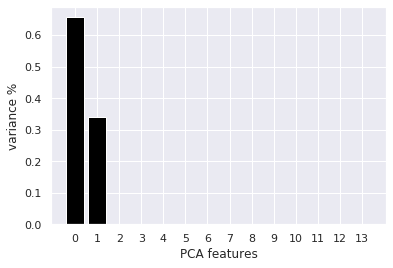

In [0]:
# Create a PCA instance: pca
pca = PCA(n_components=14)
principalComponents = pca.fit_transform(X)# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
print(pca.explained_variance_ratio_)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

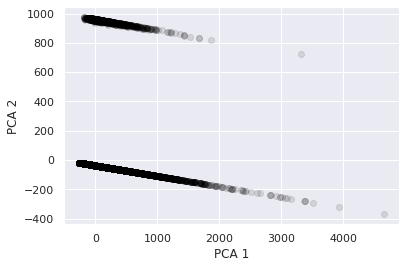

In [0]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

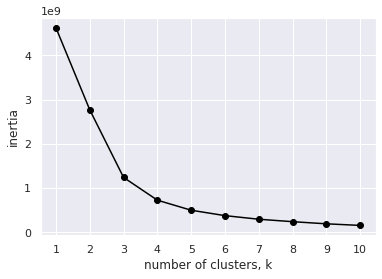

In [0]:
ks = range(1, 11)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [0]:
PCA_components.iloc[:,:2]

,0,1
0,0.215547,-36.782440
1,-111.496146,-28.752251
2,-34.698006,-34.310547
3,-109.504450,-28.928350
4,46.097183,-40.079961
...,...,...
45302,-207.253570,-21.938576
45303,-41.679321,-33.821248
45304,-196.281413,-22.727219
45305,266.528546,-55.920054


In [0]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(PCA_components.iloc[:,:2])

bank_df['clusters_pca'] = pred_y


bank_df.clusters_pca.unique()
bank_df['clusters_pca'].value_counts()

0    39679
1     5628
Name: clusters_pca, dtype: int64

In [0]:
s = silhouette_score(PCA_components.iloc[:,:2], kmeans.labels_)
print('Silhouette Score:', s)

Silhouette Score: 0.6762420215476166


Text(0.5, 1.0, 'KMeans - PCA')

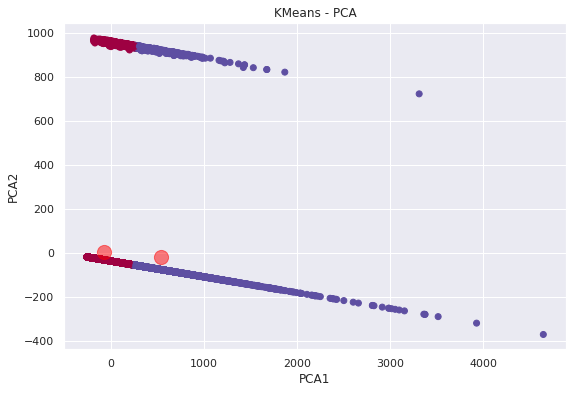

In [0]:
plt.subplots(figsize=(9,6))
plt.scatter(x=PCA_components.iloc[:,0], y=PCA_components.iloc[:,1], 
            c=kmeans.labels_, cmap=plt.cm.Spectral);
plt.xlabel('PCA1')
plt.ylabel('PCA2')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans - PCA')
#plt.savefig('initial_clusters', bpi=150)

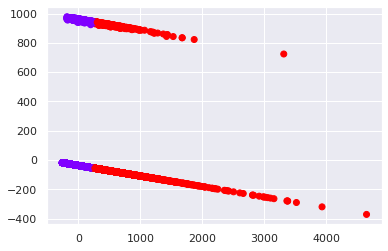

In [0]:
plt.scatter(PCA_components.iloc[:,0],PCA_components.iloc[:,1], c=kmeans.labels_, cmap='rainbow')



In [0]:
matrix = confusion_matrix(y, bank_df['clusters_pca'])
print(matrix)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y, bank_df['clusters_pca'])
print('Accuracy: %f' % accuracy)
#precision tp / (tp + fp)
precision = precision_score(y, bank_df['clusters_pca'])
print('Precision: %f' % precision)

[[36966  3250]
 [ 2713  2378]]
Accuracy: 0.868387
Precision: 0.422530


# **Random Forest - Feature Selection**

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [0]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [0]:
boolvec=sel.get_support()
boolvec.astype(bool)
boolvec

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True])

In [0]:
input_file=bank_df.iloc[:,0:48]
#X_RF=input_file.loc[:, sel.get_support()]
#input_file=sgemm_df.loc[:, sel.get_support()].head()
selected_feat= input_file.columns[(sel.get_support())]
#selected_feat = np.where(boolvec[:,None], X_train,X_train)
len(selected_feat)

10

In [0]:
print(selected_feat)
#sgemm_df


Index(['age', 'duration', 'campaign', 'pdays', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'poutcome_success', 'month',
       'day_of_week'],
      dtype='object')


In [0]:
X_RF=input_file.loc[:, sel.get_support()]


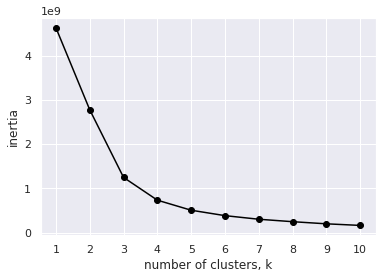

In [0]:
ks = range(1, 11)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_RF)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [0]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_RF)

bank_df['clusters_rf'] = pred_y


bank_df.clusters_rf.unique()
bank_df['clusters_rf'].value_counts()

0    39679
1     5628
Name: clusters_rf, dtype: int64

In [0]:
s = silhouette_score(X_RF, kmeans.labels_)
print('Silhouette Score:', s)

Silhouette Score: 0.6730846681712902


In [0]:
matrix = confusion_matrix(y, bank_df['clusters_rf'])
print(matrix)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y, bank_df['clusters_rf'])
print('Accuracy: %f' % accuracy)
#precision tp / (tp + fp)
precision = precision_score(y, bank_df['clusters_rf'])
print('Precision: %f' % precision)

[[36966  3250]
 [ 2713  2378]]
Accuracy: 0.868387
Precision: 0.422530


# ICA

In [0]:
ICA = FastICA(n_components=2, random_state=42) 
X_ica=ICA.fit_transform(X)


Text(0.5, 1.0, 'KMeans - ICA')

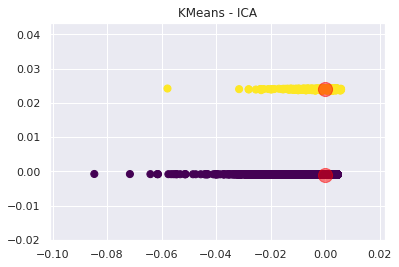

In [0]:
## K-Means Clustering Algorithm using ICA
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_ica)

bank_df['clusters_ica'] = pred_y        
#print(correct/len(X_ica))
#yp=kmeans.predict(ica_X_train)
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=pred_y, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans - ICA')

In [0]:
s = silhouette_score(X_ica, kmeans.labels_)
print('Silhouette Score:', s)

Silhouette Score: 0.8378181918856107


In [0]:
bank_df['clusters_ica'].value_counts()

0    43632
1     1675
Name: clusters_ica, dtype: int64

In [0]:
# confusion matrix

matrix = confusion_matrix(y, bank_df['clusters_ica'])
print(matrix)

[[39608   608]
 [ 4024  1067]]


In [0]:


# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y, bank_df['clusters_ica'])
print('Accuracy: %f' % accuracy)
#precision tp / (tp + fp)
precision = precision_score(y, bank_df['clusters_ica'])
print('Precision: %f' % precision)

Accuracy: 0.897764
Precision: 0.637015


# RCA

In [0]:
rca = GaussianRandomProjection(n_components=2, eps=0.1, random_state=42)
X_rca=rca.fit_transform(X)


Text(0.5, 1.0, 'KMeans - RCA')

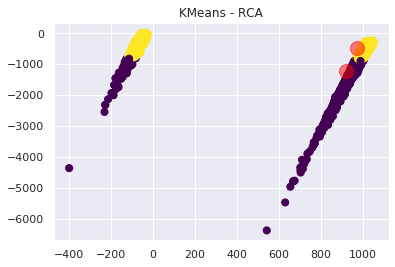

In [0]:
## K-Means Clustering Algorithm using RCA
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_rca)

bank_df['clusters_rca'] = pred_y        
#print(correct/len(X_ica))
#yp=kmeans.predict(ica_X_train)
plt.scatter(X_rca[:, 0], X_rca[:, 1], c=pred_y, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans - RCA')

In [0]:
s = silhouette_score(X_rca, kmeans.labels_)
print('Silhouette Score:', s)

Silhouette Score: 0.6739651580579746


In [0]:

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y, bank_df['clusters_rca'])
print('Accuracy: %f' % accuracy)
#precision tp / (tp + fp)
precision = precision_score(y, bank_df['clusters_rca'])
print('Precision: %f' % precision)

Accuracy: 0.136977
Precision: 0.070776
